In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv') 

In [3]:
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
data.shape

(10910, 26)

In [5]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [7]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [8]:
data =  data.rename(columns={'EmploymentStatus':'Employment Status'})
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [9]:
cols = []
for i in data.columns:
    cols.append(i.lower())
data.columns = cols
data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [10]:
data.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [11]:
display(data.select_dtypes(np.number).columns)
display(len(data.select_dtypes(np.number).columns))

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

8

In [12]:
display(data.select_dtypes(object).columns)
display(len(data.select_dtypes(object).columns))

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employment status', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

17

## check for duplicates

In [13]:
duplicate = data[data.duplicated()]
display(duplicate)
print(len(duplicate))

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
1134,BV86143,NaN,21034.018150,NaN,Basic,High School or Below,2/23/11,Employed,F,26876,...,0.0,2,Personal Auto,Personal L2,Offer4,Call Center,219.209762,Four-Door Car,Medsize,A
2799,YS94121,NaN,5645.396665,NaN,Basic,High School or Below,2/27/11,Employed,M,50366,...,0.0,9,Personal Auto,Personal L1,Offer1,Call Center,428.734656,Four-Door Car,Small,A
2805,BS34332,NaN,5557.934118,NaN,Basic,High School or Below,1/30/11,Employed,F,83576,...,0.0,5,Personal Auto,Personal L3,Offer3,Web,331.200000,Two-Door Car,Medsize,A
3590,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2/7/11,Employed,M,31710,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
3877,GU42671,Arizona,6106.941981,No,Extended,Bachelor,2/21/11,Medical Leave,F,16654,...,0.0,7,Personal Auto,Personal L3,Offer1,Branch,379.200000,NaN,NaN,A
4581,ID89933,Oregon,7255.577594,No,Extended,Doctor,1/9/11,Employed,F,39786,...,NaN,9,Personal Auto,Personal L2,Offer1,Web,365.835977,NaN,NaN,NaN
4992,GS76685,California,10408.968650,Yes,Basic,High School or Below,2/18/11,Retired,M,20228,...,NaN,2,Corporate Auto,Corporate L3,Offer1,Branch,523.815839,SUV,Medsize,NaN
5734,AL78075,Oregon,3810.238281,No,Premium,High School or Below,2/13/11,Unemployed,M,0,...,0.0,1,Personal Auto,Personal L2,Offer2,Branch,777.600000,NaN,NaN,NaN
5863,OJ33945,Oregon,8692.636838,No,Basic,High School or Below,1/8/11,Employed,F,97768,...,NaN,2,Personal Auto,Personal L1,Offer3,Agent,151.843731,Two-Door Car,Medsize,A
6068,EP64069,NaN,5138.244998,NaN,Basic,Bachelor,1/8/11,Employed,F,72264,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Web,272.649844,Four-Door Car,Medsize,NaN


37


## drop duplicates

In [14]:
data = data.drop_duplicates()

In [15]:
duplicate = data[data.duplicated()]
display(duplicate)
print(len(duplicate))

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type


0


In [16]:
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer,0.00
1,state,5.65
2,customer lifetime value,0.00
3,response,5.65
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employment status,0.00
8,gender,0.00
9,income,0.00


In [17]:
data["vehicle type"].value_counts(dropna=False)

NaN    5465
A      5408
Name: vehicle type, dtype: int64

In [18]:
data['vehicle type']=data['vehicle type'].fillna('M')

/var/folders/vp/2wvfyb695rg5q5v9fgk55vpr0000gn/T/ipykernel_34462/2532457421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['vehicle type']=data['vehicle type'].fillna('M')


In [19]:
data["state"].value_counts(dropna=False)

California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
NaN            614
Name: state, dtype: int64

### deleting NaN rows is state (and responce bcs they´r in the same rows )

In [20]:
data = data.drop(labels = data[data['response'].isnull()].index.tolist(), axis = 0)

In [21]:
data.isna().sum()

customer                           0
state                              0
customer lifetime value            0
response                           0
coverage                           0
education                          0
effective to date                  0
employment status                  0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim          582
months since policy inception      0
number of open complaints        582
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                    579
vehicle size                     579
vehicle type                       0
dtype: int64

### checking rows

In [22]:
na_claim = data[data['months since last claim'].isnull()].index.tolist()
na_complaints = data[data['number of open complaints'].isnull()].index.tolist()
for i in range(582):
    if na_claim[i] == na_complaints[i]:
        print(True)
    else:
        print(False)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [23]:
data["months since last claim"].value_counts(dropna=False)

NaN     582
3.0     401
6.0     381
1.0     364
7.0     354
4.0     353
2.0     348
5.0     331
0.0     329
10.0    323
16.0    318
11.0    316
15.0    303
8.0     297
13.0    295
12.0    289
17.0    283
14.0    280
19.0    263
9.0     263
23.0    261
25.0    253
21.0    250
20.0    246
18.0    244
22.0    231
29.0    222
24.0    221
28.0    209
26.0    202
31.0    201
27.0    193
30.0    192
33.0    188
34.0    185
35.0    148
32.0    140
Name: months since last claim, dtype: int64

In [24]:
data = data.drop(labels = data[data['response'].isnull()].index.tolist(), axis = 0)

In [25]:
data = data[data['months since last claim'].isna()==False] 
print(data.isna().sum())
data.shape

customer                           0
state                              0
customer lifetime value            0
response                           0
coverage                           0
education                          0
effective to date                  0
employment status                  0
gender                             0
income                             0
location code                      0
marital status                     0
monthly premium auto               0
months since last claim            0
months since policy inception      0
number of open complaints          0
number of policies                 0
policy type                        0
policy                             0
renew offer type                   0
sales channel                      0
total claim amount                 0
vehicle class                    543
vehicle size                     543
vehicle type                       0
dtype: int64


(9677, 25)

In [26]:
data = data[data['vehicle class'].isna()==False] 
print(data.isna().sum())
data.shape

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employment status                0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64


(9134, 25)

In [27]:
data['month'] = pd.DatetimeIndex(data['effective to date']).month

In [28]:
data[data.month.isin([1,2,3])].sort_index(ascending=True).sample(5)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
1125,FD75102,California,3237.500928,No,Extended,College,1/29/11,Disabled,F,27982,...,1,Personal Auto,Personal L3,Offer4,Call Center,14.743099,Two-Door Car,Medsize,M,1
8682,KE66309,California,8432.519368,No,Basic,College,2/22/11,Employed,M,87728,...,2,Personal Auto,Personal L3,Offer2,Web,201.589875,Four-Door Car,Medsize,A,2
3753,VJ49806,California,13009.180570,No,Basic,College,2/12/11,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Agent,380.069056,Two-Door Car,Medsize,A,2
9921,SY46862,Arizona,5657.685223,No,Extended,High School or Below,2/20/11,Employed,M,98917,...,1,Corporate Auto,Corporate L1,Offer1,Agent,336.612234,Sports Car,Medsize,M,2
1439,ZH28312,California,5560.278162,No,Basic,Bachelor,2/14/11,Unemployed,F,0,...,8,Corporate Auto,Corporate L2,Offer1,Branch,65.953005,Four-Door Car,Medsize,A,2


In [29]:
data['month'].unique()

array([2, 1])

In [30]:
data

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,M,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,M,2


In [41]:
data.to_csv('cleandata.csv', index = False)

# Round 3

In [31]:
#data fraeme info

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   

In [33]:
#describe data
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [35]:
data['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [36]:
data['response_numerical'] = data['response'].map(dict(Yes=1, No=0))

<AxesSubplot:xlabel='response', ylabel='count'>

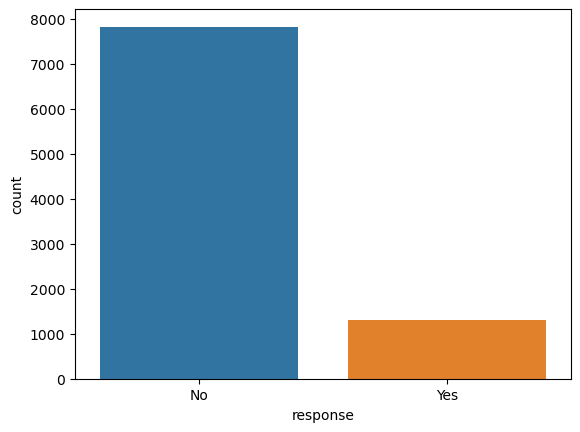

In [37]:
sns.countplot(x=data['response'])

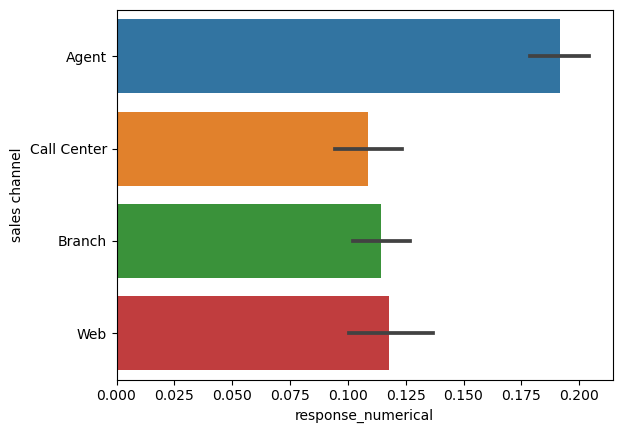

In [38]:
sns.barplot(x='response_numerical',y='sales channel', data=data)
plt.show()

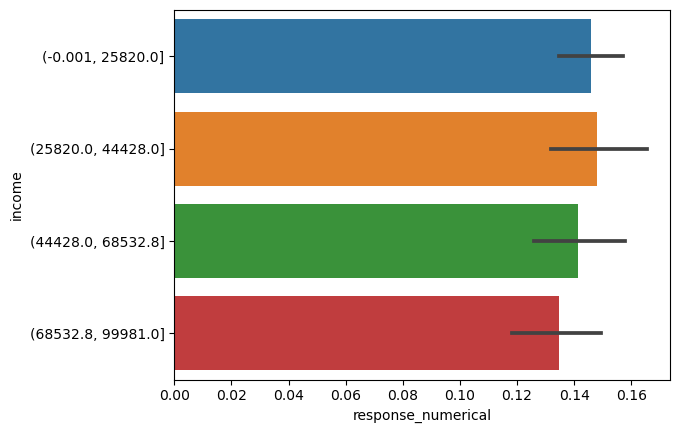

In [39]:
data['income'] = pd.qcut(data['income'], q=5, duplicates='drop')
sns.barplot(x = data["response_numerical"], y =data['income'])
plt.show()

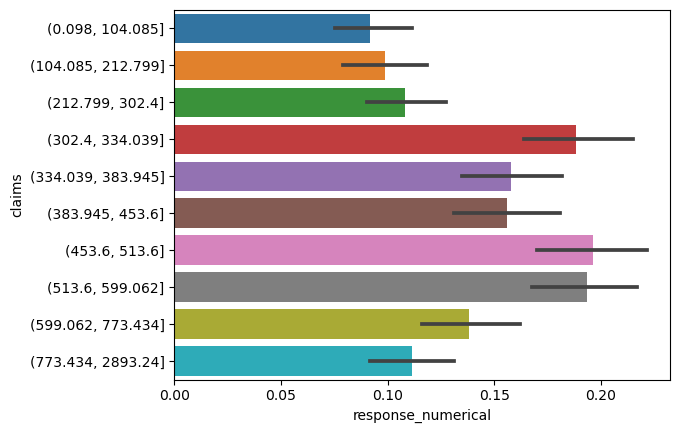

In [40]:
data['claims'] = pd.qcut(data['total claim amount'], q=10)
sns.barplot(x = data["response_numerical"], y =data['claims'])
plt.show()